In [ ]:
# reference - dataset
# @inproceedings{aishell_2017,
# title={AIShell-1: An Open-Source Mandarin Speech Corpus and A Speech Recognition Baseline},
# author={Hui Bu, Jiayu Du, Xingyu Na, Bengu Wu, Hao Zheng},
# booktitle={Oriental COCOSDA 2017},
# pages={Submitted},
# year={2017}
# }

# fine tuning methods

# @Misc{peft,
#   title =        {PEFT: State-of-the-art Parameter-Efficient Fine-Tuning methods},
#   author =       {Sourab Mangrulkar and Sylvain Gugger and Lysandre Debut and Younes Belkada and Sayak Paul and Benjamin Bossan},
#   howpublished = {\url{https://github.com/huggingface/peft}},
#   year =         {2022}
# }

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat May 10 15:39:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   46C    P8             13W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Install Lib


In [ ]:
! pip install git+https://github.com/openai/whisper.git
! pip install jiwer
! pip install -U bitsandbytes

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-ljykj56u
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-ljykj56u
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached tiktoken-0.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached tiktoken-0.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803707 sha256=54a10c4a34ee45c5a812e744a5bba540ff86e888b070c2ad9b6301286456958c
  Stored in directory: /tmp/pip-ephem-wheel-cache-r33p479_/wheels/1f/1d/98/9583695e6695a6ac0ad42d87511097dce5ba486647dbfecb0e
Successfully built openai-whisper
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install --upgrade pip
!pip install --upgrade datasets[audio] transformers accelerate evaluate jiwer tensorboard gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 129.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 142.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21/21 [evaluate]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the fol

In [ ]:
model_name_or_path = "openai/whisper-large-v2"
model_dir = "drive/MyDrive/fyp/AISHELL-1/model"


language = "Chinese"
language_abbr = "zh-CN"
task = "transcribe"
dataset_name = "AISHELL/AISHELL-1"

batch_size=64
# bacth size impact ->
# 1. Computational cost - bigger batch size will require more memory usage
# 2. Traning speed - large batch can be increasing the speed of training
# 3. Model Performance - Smaller batch sizes can lead to more robust learning

# Import Lib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

import torchaudio
import IPython.display as ipd

import whisper
import torchaudio
import torch


# import dataset

In [ ]:
from datasets import load_dataset

dataset = load_dataset("AISHELL/AISHELL-1")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/102 [00:00<?, ?it/s]

S0002.tar.gz:   0%|          | 0.00/36.5M [00:00<?, ?B/s]

S0003.tar.gz:   0%|          | 0.00/42.4M [00:00<?, ?B/s]

S0004.tar.gz:   0%|          | 0.00/25.6M [00:00<?, ?B/s]

S0005.tar.gz:   0%|          | 0.00/27.7M [00:00<?, ?B/s]

S0006.tar.gz:   0%|          | 0.00/33.5M [00:00<?, ?B/s]

S0007.tar.gz:   0%|          | 0.00/43.9M [00:00<?, ?B/s]

S0008.tar.gz:   0%|          | 0.00/35.9M [00:00<?, ?B/s]

S0009.tar.gz:   0%|          | 0.00/41.0M [00:00<?, ?B/s]

S0010.tar.gz:   0%|          | 0.00/36.8M [00:00<?, ?B/s]

S0011.tar.gz:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

S0012.tar.gz:   0%|          | 0.00/44.5M [00:00<?, ?B/s]

S0013.tar.gz:   0%|          | 0.00/44.5M [00:00<?, ?B/s]

S0014.tar.gz:   0%|          | 0.00/54.7M [00:00<?, ?B/s]

S0015.tar.gz:   0%|          | 0.00/42.5M [00:00<?, ?B/s]

S0016.tar.gz:   0%|          | 0.00/48.3M [00:00<?, ?B/s]

S0017.tar.gz:   0%|          | 0.00/36.5M [00:00<?, ?B/s]

S0018.tar.gz:   0%|          | 0.00/34.3M [00:00<?, ?B/s]

S0019.tar.gz:   0%|          | 0.00/42.6M [00:00<?, ?B/s]

S0020.tar.gz:   0%|          | 0.00/37.8M [00:00<?, ?B/s]

S0021.tar.gz:   0%|          | 0.00/32.0M [00:00<?, ?B/s]

S0022.tar.gz:   0%|          | 0.00/32.5M [00:00<?, ?B/s]

S0023.tar.gz:   0%|          | 0.00/38.0M [00:00<?, ?B/s]

S0024.tar.gz:   0%|          | 0.00/34.6M [00:00<?, ?B/s]

S0025.tar.gz:   0%|          | 0.00/38.8M [00:00<?, ?B/s]

S0026.tar.gz:   0%|          | 0.00/32.9M [00:00<?, ?B/s]

S0027.tar.gz:   0%|          | 0.00/45.3M [00:00<?, ?B/s]

S0028.tar.gz:   0%|          | 0.00/44.2M [00:00<?, ?B/s]

S0029.tar.gz:   0%|          | 0.00/33.7M [00:00<?, ?B/s]

S0030.tar.gz:   0%|          | 0.00/43.2M [00:00<?, ?B/s]

S0031.tar.gz:   0%|          | 0.00/32.7M [00:00<?, ?B/s]

S0032.tar.gz:   0%|          | 0.00/33.7M [00:00<?, ?B/s]

S0033.tar.gz:   0%|          | 0.00/36.0M [00:00<?, ?B/s]

S0034.tar.gz:   0%|          | 0.00/37.1M [00:00<?, ?B/s]

S0035.tar.gz:   0%|          | 0.00/38.6M [00:00<?, ?B/s]

S0036.tar.gz:   0%|          | 0.00/34.6M [00:00<?, ?B/s]

S0037.tar.gz:   0%|          | 0.00/33.0M [00:00<?, ?B/s]

S0038.tar.gz:   0%|          | 0.00/42.6M [00:00<?, ?B/s]

S0039.tar.gz:   0%|          | 0.00/33.0M [00:00<?, ?B/s]

S0040.tar.gz:   0%|          | 0.00/34.3M [00:00<?, ?B/s]

S0041.tar.gz:   0%|          | 0.00/38.3M [00:00<?, ?B/s]

S0042.tar.gz:   0%|          | 0.00/36.0M [00:00<?, ?B/s]

S0043.tar.gz:   0%|          | 0.00/30.1M [00:00<?, ?B/s]

S0044.tar.gz:   0%|          | 0.00/30.2M [00:00<?, ?B/s]

S0045.tar.gz:   0%|          | 0.00/35.8M [00:00<?, ?B/s]

S0046.tar.gz:   0%|          | 0.00/39.2M [00:00<?, ?B/s]

S0047.tar.gz:   0%|          | 0.00/40.8M [00:00<?, ?B/s]

S0048.tar.gz:   0%|          | 0.00/38.4M [00:00<?, ?B/s]

S0049.tar.gz:   0%|          | 0.00/33.0M [00:00<?, ?B/s]

S0050.tar.gz:   0%|          | 0.00/36.5M [00:00<?, ?B/s]

S0051.tar.gz:   0%|          | 0.00/39.0M [00:00<?, ?B/s]

S0052.tar.gz:   0%|          | 0.00/36.2M [00:00<?, ?B/s]

S0053.tar.gz:   0%|          | 0.00/35.2M [00:00<?, ?B/s]

S0054.tar.gz:   0%|          | 0.00/39.5M [00:00<?, ?B/s]

S0055.tar.gz:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

S0056.tar.gz:   0%|          | 0.00/36.1M [00:00<?, ?B/s]

S0057.tar.gz:   0%|          | 0.00/34.5M [00:00<?, ?B/s]

S0058.tar.gz:   0%|          | 0.00/30.3M [00:00<?, ?B/s]

S0059.tar.gz:   0%|          | 0.00/30.4M [00:00<?, ?B/s]

S0060.tar.gz:   0%|          | 0.00/35.7M [00:00<?, ?B/s]

S0061.tar.gz:   0%|          | 0.00/36.9M [00:00<?, ?B/s]

S0062.tar.gz:   0%|          | 0.00/34.5M [00:00<?, ?B/s]

S0063.tar.gz:   0%|          | 0.00/37.8M [00:00<?, ?B/s]

S0064.tar.gz:   0%|          | 0.00/38.0M [00:00<?, ?B/s]

S0065.tar.gz:   0%|          | 0.00/35.3M [00:00<?, ?B/s]

S0066.tar.gz:   0%|          | 0.00/38.2M [00:00<?, ?B/s]

S0067.tar.gz:   0%|          | 0.00/38.8M [00:00<?, ?B/s]

S0068.tar.gz:   0%|          | 0.00/39.8M [00:00<?, ?B/s]

S0069.tar.gz:   0%|          | 0.00/38.8M [00:00<?, ?B/s]

S0070.tar.gz:   0%|          | 0.00/42.8M [00:00<?, ?B/s]

S0071.tar.gz:   0%|          | 0.00/35.1M [00:00<?, ?B/s]

S0072.tar.gz:   0%|          | 0.00/35.4M [00:00<?, ?B/s]

S0073.tar.gz:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

S0074.tar.gz:   0%|          | 0.00/34.3M [00:00<?, ?B/s]

S0075.tar.gz:   0%|          | 0.00/39.6M [00:00<?, ?B/s]

S0076.tar.gz:   0%|          | 0.00/35.3M [00:00<?, ?B/s]

S0077.tar.gz:   0%|          | 0.00/37.4M [00:00<?, ?B/s]

S0078.tar.gz:   0%|          | 0.00/44.3M [00:00<?, ?B/s]

S0079.tar.gz:   0%|          | 0.00/31.6M [00:00<?, ?B/s]

S0080.tar.gz:   0%|          | 0.00/39.9M [00:00<?, ?B/s]

S0081.tar.gz:   0%|          | 0.00/38.9M [00:00<?, ?B/s]

S0082.tar.gz:   0%|          | 0.00/36.9M [00:00<?, ?B/s]

S0083.tar.gz:   0%|          | 0.00/39.4M [00:00<?, ?B/s]

S0084.tar.gz:   0%|          | 0.00/32.3M [00:00<?, ?B/s]

S0085.tar.gz:   0%|          | 0.00/42.6M [00:00<?, ?B/s]

S0086.tar.gz:   0%|          | 0.00/38.2M [00:00<?, ?B/s]

S0087.tar.gz:   0%|          | 0.00/35.8M [00:00<?, ?B/s]

S0088.tar.gz:   0%|          | 0.00/35.7M [00:00<?, ?B/s]

S0089.tar.gz:   0%|          | 0.00/33.8M [00:00<?, ?B/s]

S0090.tar.gz:   0%|          | 0.00/34.8M [00:00<?, ?B/s]

S0091.tar.gz:   0%|          | 0.00/38.6M [00:00<?, ?B/s]

S0092.tar.gz:   0%|          | 0.00/33.3M [00:00<?, ?B/s]

S0093.tar.gz:   0%|          | 0.00/36.6M [00:00<?, ?B/s]

S0094.tar.gz:   0%|          | 0.00/37.9M [00:00<?, ?B/s]

S0095.tar.gz:   0%|          | 0.00/37.4M [00:00<?, ?B/s]

S0096.tar.gz:   0%|          | 0.00/41.6M [00:00<?, ?B/s]

S0097.tar.gz:   0%|          | 0.00/38.6M [00:00<?, ?B/s]

S0098.tar.gz:   0%|          | 0.00/31.5M [00:00<?, ?B/s]

S0099.tar.gz:   0%|          | 0.00/29.3M [00:00<?, ?B/s]

S0100.tar.gz:   0%|          | 0.00/40.4M [00:00<?, ?B/s]

S0101.tar.gz:   0%|          | 0.00/44.4M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['wav', '__key__', '__url__'],
        num_rows: 34716
    })
})


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ls drive/MyDrive/fyp/AISHELL-1/data_aishell_transcript_aishell_transcript_v0.8.txt

drive/MyDrive/fyp/AISHELL-1/data_aishell_transcript_aishell_transcript_v0.8.txt


In [ ]:
label_path = "drive/MyDrive/fyp/AISHELL-1/data_aishell_transcript_aishell_transcript_v0.8.txt"

In [ ]:
labels = {}

# Read the transcript file line by line
with open(label_path, 'r') as f:
    for line in f:
        parts = line.strip().split(' ')
        audio_file = parts[0]  # Audio file path (like BAC009S0002W0122.wav)
        transcript = ' '.join(parts[1:])  # Transcript text
        labels[audio_file] = transcript

# Add the labels to the dataset
def add_labels_to_sample(sample):
    # Extract audio file name using '__key__' and add '.wav' extension
    audio_file_name = sample['__key__'].split('/')[-1]

    # Get the corresponding transcript from the labels dictionary
    transcript = labels.get(audio_file_name, None)

    if transcript:
        # Remove spaces from the transcript (if desired)
        transcript_no_spaces = transcript.replace(' ', '')  # This removes all spaces

        sample['transcript'] = transcript_no_spaces
    else:
        print(f"Warning: No transcript found for {audio_file_name}")
        sample['transcript'] = None

    return sample

# # Print the result
# print(sample_with_label)  # Print the first sample with the label added

# Add the labels to the training dataset only
dataset['train'] = dataset['train'].map(add_labels_to_sample)

# Check the result by printing the first sample
print(dataset['train'][0])  # Print the first sample to see the transcript added


Map:   0%|          | 0/34716 [00:00<?, ? examples/s]

{'wav': {'path': 'train/S0002/BAC009S0002W0122.wav', 'array': array([-0.00033569, -0.00054932, -0.00048828, ..., -0.00338745,
       -0.00314331, -0.00350952]), 'sampling_rate': 16000}, '__key__': 'train/S0002/BAC009S0002W0122', '__url__': '/root/.cache/huggingface/hub/datasets--AISHELL--AISHELL-1/snapshots/bbe295d530192a4cd41644b711c9aecd087df653/data_aishell/wav/S0002.tar.gz', 'transcript': '而对楼市成交抑制作用最大的限购'}


# Data Exploratory

In [ ]:
print(dataset['train'][0])

{'wav': {'path': 'train/S0002/BAC009S0002W0122.wav', 'array': array([-0.00033569, -0.00054932, -0.00048828, ..., -0.00338745,
       -0.00314331, -0.00350952]), 'sampling_rate': 16000}, '__key__': 'train/S0002/BAC009S0002W0122', '__url__': '/root/.cache/huggingface/hub/datasets--AISHELL--AISHELL-1/snapshots/bbe295d530192a4cd41644b711c9aecd087df653/data_aishell/wav/S0002.tar.gz', 'transcript': '而对楼市成交抑制作用最大的限购'}


In [ ]:
print(dataset['train'].features)


{'wav': Audio(sampling_rate=None, mono=True, decode=True, id=None), '__key__': Value(dtype='string', id=None), '__url__': Value(dtype='string', id=None), 'transcript': Value(dtype='string', id=None)}


In [ ]:
# Extract the audio sample correctly
sample_audio = dataset["train"][0]["wav"]

# If using Hugging Face datasets, the audio is usually a dictionary with 'array' and 'sampling_rate' keys
waveform = sample_audio["array"]  # Extract waveform
sample_rate = sample_audio["sampling_rate"]  # Extract sampling rate

# Print metadata
print(f"Waveform Shape: {waveform.shape}, Sample Rate: {sample_rate}")

# Listen to the audio
ipd.Audio(waveform, rate=sample_rate)


Waveform Shape: (95984,), Sample Rate: 16000


In [ ]:
sample_audio = dataset["train"][0]["wav"]
print(sample_audio)


{'path': 'train/S0002/BAC009S0002W0122.wav', 'array': array([-0.00033569, -0.00054932, -0.00048828, ..., -0.00338745,
       -0.00314331, -0.00350952]), 'sampling_rate': 16000}


In [ ]:


waveform_tensor = torch.tensor(waveform)
print(f"Converted to Tensor: {waveform_tensor.shape}")


Converted to Tensor: torch.Size([95984])


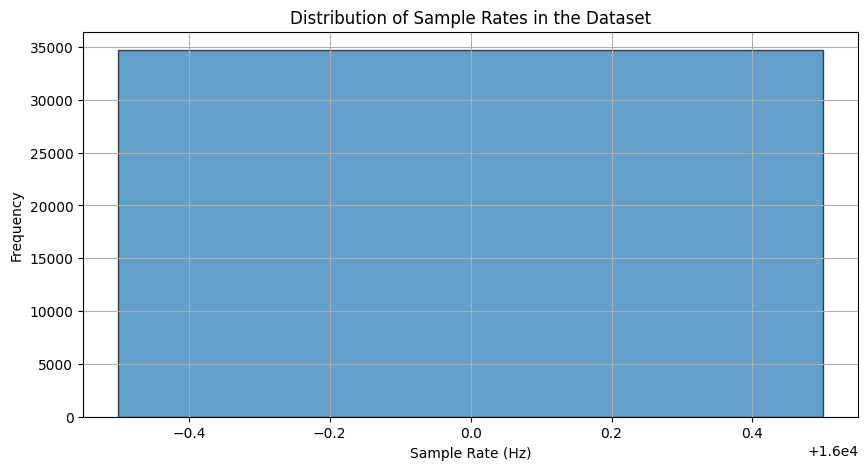

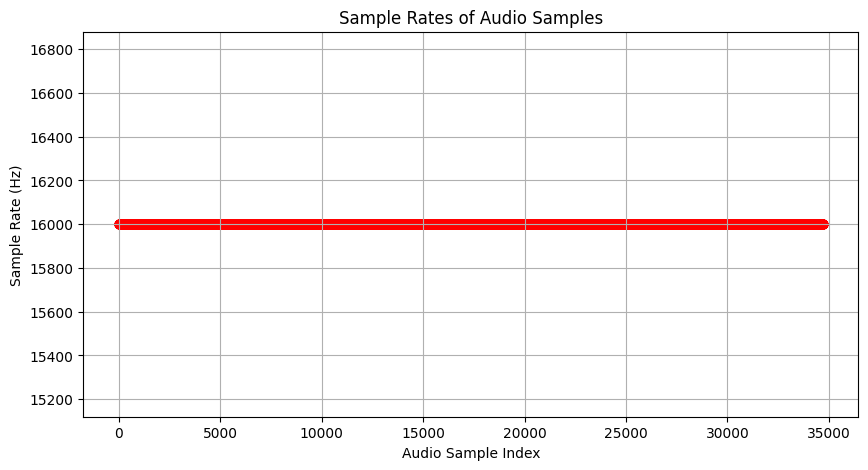

In [ ]:
# Extract all sample rates
sample_rates = [dataset["train"][i]["wav"]["sampling_rate"] for i in range(len(dataset["train"]))]

# Plot sample rates as a histogram
plt.figure(figsize=(10, 5))
plt.hist(sample_rates, bins=len(set(sample_rates)), edgecolor='black', alpha=0.7)
plt.xlabel("Sample Rate (Hz)")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Rates in the Dataset")
plt.grid(True)
plt.show()

# Optional: If you want to see each sample rate as a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(range(len(sample_rates)), sample_rates, alpha=0.7, color="red")
plt.xlabel("Audio Sample Index")
plt.ylabel("Sample Rate (Hz)")
plt.title("Sample Rates of Audio Samples")
plt.grid(True)
plt.show()


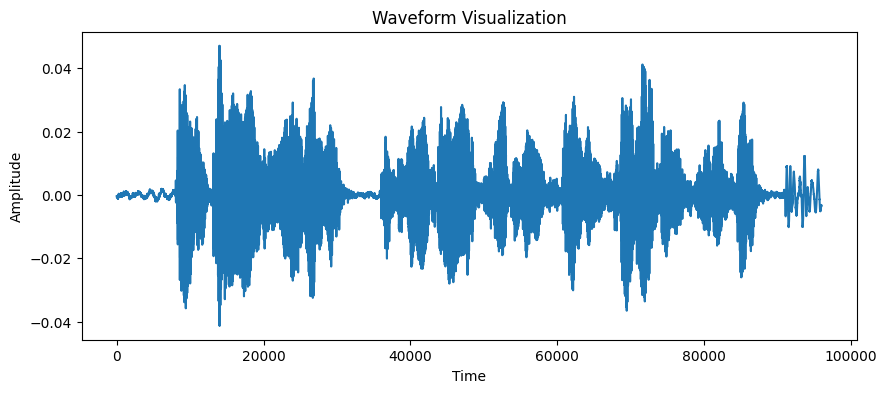

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(waveform)
plt.title("Waveform Visualization")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


## check missing transcript data

In [ ]:
missing_transcripts_count = sum(1 for sample in dataset['train'] if sample['transcript'] is None)

# Print the number of samples with missing transcripts
print(f"Number of samples with missing transcripts: {missing_transcripts_count}")

# Remove samples with missing transcripts
dataset['train'] = dataset['train'].filter(lambda sample: sample['transcript'] is not None)

# Check the result by printing the first sample of the cleaned dataset
print(dataset['train'][0])

Number of samples with missing transcripts: 37


Filter:   0%|          | 0/34716 [00:00<?, ? examples/s]

{'wav': {'path': 'train/S0002/BAC009S0002W0122.wav', 'array': array([-0.00033569, -0.00054932, -0.00048828, ..., -0.00338745,
       -0.00314331, -0.00350952]), 'sampling_rate': 16000}, '__key__': 'train/S0002/BAC009S0002W0122', '__url__': '/root/.cache/huggingface/hub/datasets--AISHELL--AISHELL-1/snapshots/bbe295d530192a4cd41644b711c9aecd087df653/data_aishell/wav/S0002.tar.gz', 'transcript': '而对楼市成交抑制作用最大的限购'}


## Testing data

In [ ]:
import torch
import librosa
import whisper

# Load the Whisper model
model = whisper.load_model("small")

# Get a sample from the AISHELL-1 dataset
sample = dataset["train"][0]

# Extract the audio data and sampling rate
audio_array = sample["wav"]["array"]
sampling_rate = sample["wav"]["sampling_rate"]

# Convert audio to float32 (as Whisper expects float32)
audio_array = audio_array.astype('float32')

# Resample audio to Whisper's required 16kHz sample rate (if it's not 16kHz already)
audio_resampled = librosa.resample(audio_array, orig_sr=sampling_rate, target_sr=16000)

# Pad or trim the audio to fit Whisper's input size (up to 30 seconds)
audio = whisper.pad_or_trim(audio_resampled)

# Create log-Mel spectrogram for Whisper
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# Detect language
_, probs = model.detect_language(mel)
print(f"Detected language: {max(probs, key=probs.get)}")

# Decode audio to text
options = whisper.DecodingOptions()
result = whisper.decode(model, mel, options)

true_label = sample["transcript"]


# Output the recognized text
print("Recognized Text:", result.text)
print("True Label :",true_label)



100%|███████████████████████████████████████| 461M/461M [00:38<00:00, 12.5MiB/s]


Detected language: zh
Recognized Text: 而对面楼是成交一直作用最大的先购
True Label : 而对楼市成交抑制作用最大的限购


# Start Training


In [ ]:
from transformers import WhisperFeatureExtractor

feature_extractor = WhisperFeatureExtractor.from_pretrained(model_name_or_path)

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

In [ ]:
from transformers import WhisperTokenizer

tokenizer = WhisperTokenizer.from_pretrained(model_name_or_path, language='bn', task=task)

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

In [ ]:
from transformers import WhisperProcessor

processor = WhisperProcessor.from_pretrained(model_name_or_path, language='bn', task=task)

In [ ]:
dataset = dataset.remove_columns(
    ["__key__"]
)

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['wav', '__url__', 'transcript'],
        num_rows: 34679
    })
})


##Split data

In [ ]:
from datasets import load_dataset

# Example: Load your dataset as a DatasetDict
# dataset = load_dataset('some_dataset')

subset_fraction = 0.25
subset_size = int(len(dataset["train"]) * subset_fraction)

# Subset the 'train' portion of the dataset
train_subset = dataset["train"].shuffle(seed=42).select(range(subset_size))

# Now perform the splits on the subset
train_temp = train_subset.train_test_split(test_size=0.3, seed=42)
test_valid = train_temp["test"].train_test_split(test_size=0.5, seed=42)

train_dataset = train_temp["train"]
val_dataset = test_valid["train"]
test_dataset = test_valid["test"]

print(f"Training: {len(train_dataset)}, Validation: {len(val_dataset)}, Testing: {len(test_dataset)}")


Training: 6068, Validation: 1300, Testing: 1301


In [ ]:
from datasets import Audio, DatasetDict

dataset = DatasetDict()

dataset["train"] = train_dataset
dataset["validation"] = val_dataset
dataset["test"] = test_dataset

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['wav', '__url__', 'transcript'],
        num_rows: 6068
    })
    validation: Dataset({
        features: ['wav', '__url__', 'transcript'],
        num_rows: 1300
    })
    test: Dataset({
        features: ['wav', '__url__', 'transcript'],
        num_rows: 1301
    })
})

## Data preprocessing for training


In [ ]:
def prepare_dataset(batch):
    try:
        audio = batch["wav"]
        features = feature_extractor(
            audio["array"],
            sampling_rate=audio["sampling_rate"]
        )
        batch["input_features"] = features.input_features[0]
        batch["labels"] = tokenizer(batch["transcript"]).input_ids
    except Exception as e:
        print(f"Error processing sample: {e}")
        batch["input_features"] = None  # Mark for filtering later
    return batch

tokenized_dataset = dataset.map(prepare_dataset)
# tokenized_dataset = tokenized_dataset.filter(lambda x: x["input_features"] is not None)

Map:   0%|          | 0/6068 [00:00<?, ? examples/s]

Map:   0%|          | 0/1300 [00:00<?, ? examples/s]

Map:   0%|          | 0/1301 [00:00<?, ? examples/s]

Filter:   0%|          | 0/6068 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1300 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1301 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['wav', '__url__', 'transcript', 'input_features', 'labels'],
        num_rows: 6068
    })
    validation: Dataset({
        features: ['wav', '__url__', 'transcript', 'input_features', 'labels'],
        num_rows: 1300
    })
    test: Dataset({
        features: ['wav', '__url__', 'transcript', 'input_features', 'labels'],
        num_rows: 1301
    })
})

## Check missing feature

In [ ]:
missing_features = [
    i for i, x in enumerate(tokenized_dataset)
    if "input_features" not in x
]
print(f"Samples missing 'input_features': {missing_features}")

Samples missing 'input_features': [0, 1, 2]


In [ ]:
import torch

from dataclasses import dataclass
from typing import Any, Dict, List, Union

# 定义一个针对语音到文本任务的数据整理器类
@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any  # 处理器结合了特征提取器和分词器

    # 整理器函数，将特征列表处理成一个批次
    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # 从特征列表中提取输入特征，并填充以使它们具有相同的形状
        input_features = [{"input_features": feature["input_features"]} for feature in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")

        # 从特征列表中提取标签特征（文本令牌），并进行填充
        label_features = [{"input_ids": feature["labels"]} for feature in features]
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        # 使用-100替换标签中的填充区域，-100通常用于在损失计算中忽略填充令牌
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        # 如果批次中的所有序列都以句子开始令牌开头，则移除它
        if (labels[:, 0] == self.processor.tokenizer.bos_token_id).all().cpu().item():
            labels = labels[:, 1:]

        # 将处理过的标签添加到批次中
        batch["labels"] = labels

        return batch  # 返回最终的批次，准备好进行训练或评估

In [ ]:
# 用给定的处理器实例化数据整理器
data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)

In [ ]:
from transformers import WhisperForConditionalGeneration

model = WhisperForConditionalGeneration.from_pretrained(model_name_or_path, load_in_8bit=True,
#                                                         torch_dtype=torch.float16,
                                                        device_map="auto")

config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors:   0%|          | 0.00/6.17G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/4.29k [00:00<?, ?B/s]

In [ ]:
from peft import prepare_model_for_kbit_training

model = prepare_model_for_kbit_training (model)

In [ ]:
import peft
print(peft.__version__)


0.15.2


In [ ]:
from peft import LoraConfig, PeftModel, LoraModel, LoraConfig, get_peft_model

# 创建一个LoraConfig对象，用于设置LoRA（Low-Rank Adaptation）的配置参数
config = LoraConfig(
    r=4,  # LoRA的秩，影响LoRA矩阵的大小
    lora_alpha=64,  # LoRA适应的比例因子
    # 指定将LoRA应用到的模型模块，通常是attention和全连接层的投影。
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,  # 在LoRA模块中使用的dropout率
    bias="none",  # 设置bias的使用方式，这里没有使用bias
)

In [ ]:
peft_model = get_peft_model(model, config)

In [ ]:
# 打印 LoRA 微调训练的模型参数
peft_model.print_trainable_parameters()

trainable params: 1,966,080 || all params: 1,545,271,040 || trainable%: 0.1272


In [ ]:
from transformers import Seq2SeqTrainingArguments

# 设置序列到序列模型训练的参数
training_args = Seq2SeqTrainingArguments(
    output_dir=model_dir,  # 指定模型输出和保存的目录
    per_device_train_batch_size=batch_size,  # 每个设备上的训练批量大小
    learning_rate=1e-3,  # 学习率
    num_train_epochs=1,  # 训练的总轮数
    eval_strategy="epoch",  # 设置评估策略，这里是在每个epoch结束时进行评估
    # warmup_steps=50,  # 在训练初期增加学习率的步数，有助于稳定训练
    # fp16=True,  # 启用混合精度训练，可以提高训练速度，同时减少内存使用
    per_device_eval_batch_size=batch_size,  # 每个设备上的评估批量大小
    generation_max_length=128,  # 生成任务的最大长度
    logging_steps=10,  # 指定日志记录的步骤，用于跟踪训练进度
    remove_unused_columns=False,  # 是否删除不使用的列，以减少数据处理开销
    label_names=["labels"],  # 指定标签列的名称，用于训练过程中
    # evaluation_strategy="steps",
    # eval_steps=25,
)

In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=peft_model,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    data_collator=data_collator,
    tokenizer=processor.feature_extractor,
)
peft_model.config.use_cache = False

<ipython-input-49-ded92f13695c>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [ ]:
trainer.train()

/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Epoch,Training Loss,Validation Loss
1,0.078900,0.089829


/usr/local/lib/python3.11/dist-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


TrainOutput(global_step=95, training_loss=0.23560247672231574, metrics={'train_runtime': 3474.8884, 'train_samples_per_second': 1.746, 'train_steps_per_second': 0.027, 'total_flos': 1.2900581203968e+19, 'train_loss': 0.23560247672231574, 'epoch': 1.0})

In [ ]:
trainer.save_model(model_dir)

In [ ]:
peft_model.eval()

PeftModel(
  (base_model): LoraModel(
    (model): WhisperForConditionalGeneration(
      (model): WhisperModel(
        (encoder): WhisperEncoder(
          (conv1): Conv1d(80, 1280, kernel_size=(3,), stride=(1,), padding=(1,))
          (conv2): Conv1d(1280, 1280, kernel_size=(3,), stride=(2,), padding=(1,))
          (embed_positions): Embedding(1500, 1280)
          (layers): ModuleList(
            (0-31): 32 x WhisperEncoderLayer(
              (self_attn): WhisperSdpaAttention(
                (k_proj): Linear8bitLt(in_features=1280, out_features=1280, bias=False)
                (v_proj): lora.Linear8bitLt(
                  (base_layer): Linear8bitLt(in_features=1280, out_features=1280, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.05, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=1280, out_features=4, bias=False)
                  )
            

In [ ]:
# Save the processor alongside the model
model_dir = "/content/drive/MyDrive/fyp/AISHELL-1/model/final"
processor.save_pretrained(model_dir)


[]

In [ ]:
trainer.save_model(model_dir)
processor.save_pretrained(model_dir)


[]